In [1]:
!wget -nc https://lazyprogrammer.me/course_files/SPY.csv
!wget -nc https://lazyprogrammer.me/course_files/sp500sub.csv

--2026-01-19 20:31:43--  https://lazyprogrammer.me/course_files/SPY.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 251935 (246K) [text/csv]
Saving to: ‘SPY.csv’

SPY.csv             100%[===================>] 246.03K   238KB/s    in 1.0s    

2026-01-19 20:31:45 (238 KB/s) - ‘SPY.csv’ saved [251935/251935]

File ‘sp500sub.csv’ already there; not retrieving.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
spy = pd.read_csv('SPY.csv', index_col=0, parse_dates=True)
spy.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800


In [4]:
spy['SPY'] = spy['Close'].pct_change(1)

In [5]:
index = pd.read_csv('sp500sub.csv', index_col=0, parse_dates=True)

In [6]:
aapl = index[index['Name'] == 'AAPL'].copy()

In [7]:
aapl['AAPL'] = aapl['Close'].pct_change(1)

In [8]:
joined = aapl[['AAPL']].join(spy['SPY'])

In [9]:
joined.head()

,AAPL,SPY
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.001729,0.002647
2010-01-06,-0.015906,0.000704
2010-01-07,-0.001849,0.004221
2010-01-08,0.006648,0.003328


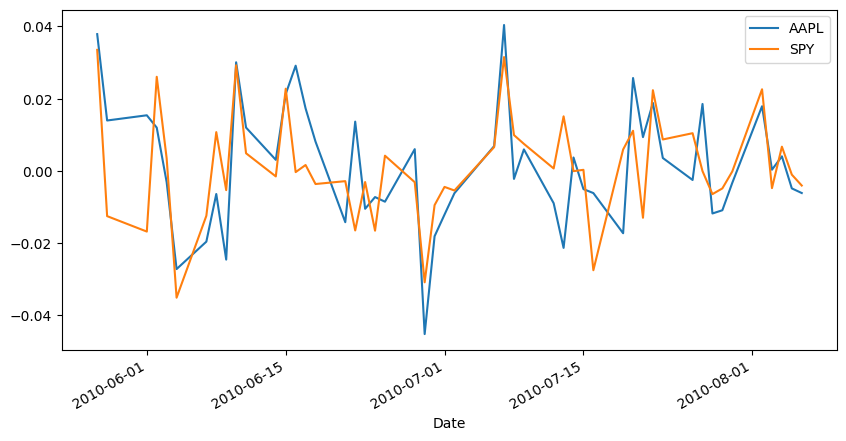

In [10]:
joined.iloc[100:150].plot(figsize=(10, 5));

<Axes: xlabel='SPY', ylabel='AAPL'>

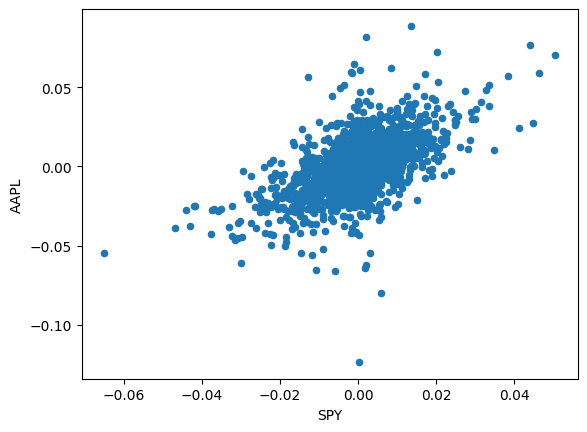

In [11]:
joined.plot.scatter('SPY', 'AAPL')

In [12]:
# make the dataset
joined.dropna(inplace=True)
X = joined[['SPY']].to_numpy()
Y = joined[['AAPL']].to_numpy()

In [13]:
X.shape, Y.shape

((2262, 1), (2262, 1))

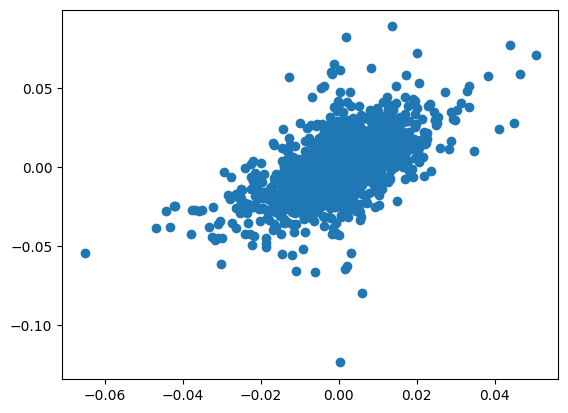

In [14]:
plt.scatter(X, Y);

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, Y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


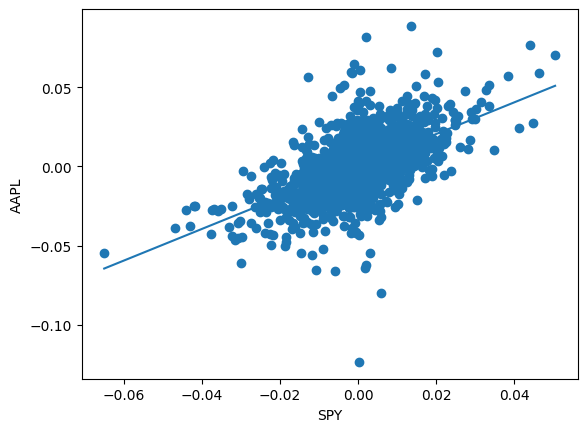

In [16]:
X_predict = np.linspace(X.min(), X.max(), 5).reshape(-1, 1)
Y_predict = model.predict(X_predict)

plt.scatter(X, Y);
plt.xlabel('SPY');
plt.ylabel('AAPL');
plt.plot(X_predict, Y_predict);

In [17]:
beta = model.coef_
alpha = model.intercept_
alpha, beta

(array([0.00046298]), array([[0.99836387]]))

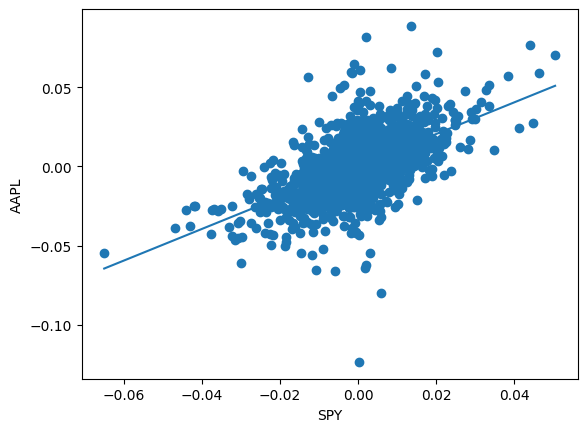

In [18]:
# Manual calculation
Y_predict = beta * X_predict + alpha

plt.scatter(X, Y);
plt.xlabel('SPY');
plt.ylabel('AAPL');
plt.plot(X_predict, Y_predict);

In [19]:
joined.std()

AAPL    0.016201
SPY     0.009430
dtype: float64

In [20]:
joined['AAPL'].std() / joined['SPY'].std()

np.float64(1.7179632360403778)